In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
#データセットのインポート
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
events_dataset = pd.read_csv('holidays_events.csv')
oil_dataset = pd.read_csv('oil.csv')
stores_dataset = pd.read_csv('stores.csv')

In [3]:
train_dataset

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
test_dataset

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
events_dataset

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [6]:
oil_dataset

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [7]:
stores_dataset.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
train_dataset

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [9]:
train_dataset = train_dataset.drop(train_dataset.index[0:2000000])

In [10]:
from datetime import datetime

In [11]:
train_dataset['date'] = pd.to_datetime(train_dataset['date'])
test_dataset['date'] = pd.to_datetime(test_dataset['date'])
events_dataset['date'] = pd.to_datetime(events_dataset['date'])
oil_dataset['date'] = pd.to_datetime(oil_dataset['date'])

In [12]:
train_dataset['drop'] = 0
test_dataset['drop'] = 1

In [13]:
train_dataset_up = test_dataset.append(train_dataset, sort=False).reset_index(drop=True)

In [14]:
train_dataset_up = train_dataset_up.merge(stores_dataset, how='left', on='store_nbr')
train_dataset_up = train_dataset_up.merge(events_dataset, how='left', on='date')
train_dataset_up = train_dataset_up.merge(oil_dataset, how='left', on='date')

In [15]:
train_dataset_up

,id,date,store_nbr,family,onpromotion,drop,sales,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,1,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.80
1,3000889,2017-08-16,1,BABY CARE,0,1,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.80
2,3000890,2017-08-16,1,BEAUTY,2,1,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,1,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.80
4,3000892,2017-08-16,1,BOOKS,0,1,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056125,3000883,2017-08-15,9,POULTRY,0,0,438.133,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
1056126,3000884,2017-08-15,9,PREPARED FOODS,1,0,154.553,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
1056127,3000885,2017-08-15,9,PRODUCE,148,0,2419.729,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
1056128,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8,0,121.000,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


In [16]:
train_dataset_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056130 entries, 0 to 1056129
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1056130 non-null  int64         
 1   date         1056130 non-null  datetime64[ns]
 2   store_nbr    1056130 non-null  int64         
 3   family       1056130 non-null  object        
 4   onpromotion  1056130 non-null  int64         
 5   drop         1056130 non-null  int64         
 6   sales        1027618 non-null  float64       
 7   city         1056130 non-null  object        
 8   state        1056130 non-null  object        
 9   type_x       1056130 non-null  object        
 10  cluster      1056130 non-null  int64         
 11  type_y       204930 non-null   object        
 12  locale       204930 non-null   object        
 13  locale_name  204930 non-null   object        
 14  description  204930 non-null   object        
 15  transferred  20

In [17]:
train_dataset_up = train_dataset_up.drop(['locale_name', 'description', 'locale'], axis=1)

In [18]:
train_dataset_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056130 entries, 0 to 1056129
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1056130 non-null  int64         
 1   date         1056130 non-null  datetime64[ns]
 2   store_nbr    1056130 non-null  int64         
 3   family       1056130 non-null  object        
 4   onpromotion  1056130 non-null  int64         
 5   drop         1056130 non-null  int64         
 6   sales        1027618 non-null  float64       
 7   city         1056130 non-null  object        
 8   state        1056130 non-null  object        
 9   type_x       1056130 non-null  object        
 10  cluster      1056130 non-null  int64         
 11  type_y       204930 non-null   object        
 12  transferred  204930 non-null   object        
 13  dcoilwtico   718146 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage

In [19]:
train_dataset_up['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [20]:
train_dataset_up['city'].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [21]:
train_dataset_up['state'].unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

In [22]:
train_dataset_up['transferred'].unique()

array([nan, False, True], dtype=object)

In [23]:
train_dataset_up['type_x'].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

In [24]:
train_dataset_up['type_y'].unique()

array([nan, 'Holiday', 'Event', 'Additional', 'Transfer', 'Bridge',
       'Work Day'], dtype=object)

In [25]:
train_dataset_up['type_y'].isna().value_counts()

True     851200
False    204930
Name: type_y, dtype: int64

In [26]:
#エンコーディング
category = ['family', 'city', 'state', 'type_x', 'type_y', 'transferred' ]
for column in category:
    train_dataset_up[column] = train_dataset_up[column].fillna('missing', inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in category:
    train_dataset_up[column] = le.fit_transform(train_dataset_up[column])

In [27]:
train_dataset_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056130 entries, 0 to 1056129
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1056130 non-null  int64         
 1   date         1056130 non-null  datetime64[ns]
 2   store_nbr    1056130 non-null  int64         
 3   family       1056130 non-null  int64         
 4   onpromotion  1056130 non-null  int64         
 5   drop         1056130 non-null  int64         
 6   sales        1027618 non-null  float64       
 7   city         1056130 non-null  int64         
 8   state        1056130 non-null  int64         
 9   type_x       1056130 non-null  int64         
 10  cluster      1056130 non-null  int64         
 11  type_y       1056130 non-null  int64         
 12  transferred  1056130 non-null  int64         
 13  dcoilwtico   718146 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(11)
memory usage: 120.9 MB

In [28]:
train_dataset_up['dcoilwtico'].isna().value_counts()

False    718146
True     337984
Name: dcoilwtico, dtype: int64

In [29]:
train_dataset_up.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
drop                0
sales           28512
city                0
state               0
type_x              0
cluster             0
type_y              0
transferred         0
dcoilwtico     337984
dtype: int64

In [30]:
oil_med = train_dataset_up['dcoilwtico'].median()
train_dataset_up['dcoilwtico'] = train_dataset_up['dcoilwtico'].fillna(oil_med)

In [31]:
train_dataset_up = train_dataset_up.drop(['id'], axis=1)

In [32]:
train_dataset_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056130 entries, 0 to 1056129
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1056130 non-null  datetime64[ns]
 1   store_nbr    1056130 non-null  int64         
 2   family       1056130 non-null  int64         
 3   onpromotion  1056130 non-null  int64         
 4   drop         1056130 non-null  int64         
 5   sales        1027618 non-null  float64       
 6   city         1056130 non-null  int64         
 7   state        1056130 non-null  int64         
 8   type_x       1056130 non-null  int64         
 9   cluster      1056130 non-null  int64         
 10  type_y       1056130 non-null  int64         
 11  transferred  1056130 non-null  int64         
 12  dcoilwtico   1056130 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(10)
memory usage: 112.8 MB


In [33]:
import datetime as dt
train_dataset_up['date']=train_dataset_up['date'].map(dt.datetime.toordinal)

In [34]:
train_dataset1 = train_dataset_up.query('drop == 0').drop(['drop'], axis=1)
test_dataset1 = train_dataset_up.query('drop == 1').drop(['drop'], axis=1)

In [35]:
num_cols_heat = ['sales','store_nbr', 'family', 'onpromotion','city', 'state', 'type_x', 'cluster', 'type_y', 'transferred','dcoilwtico']

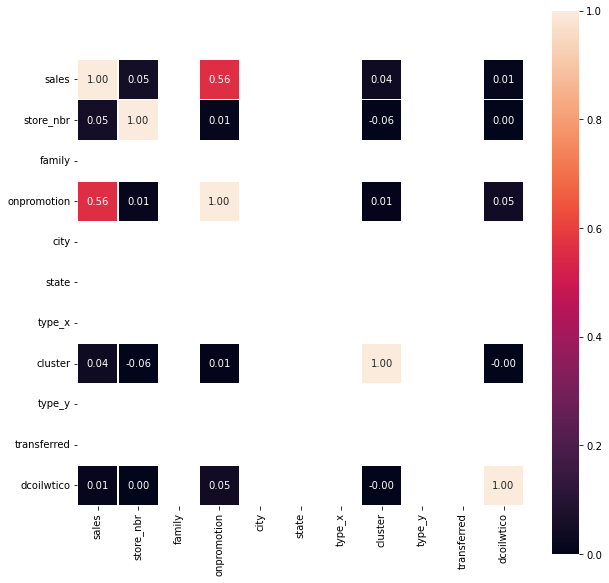

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_dataset1[num_cols_heat].corr(), square=True, vmin=0, annot=True, fmt='.2f', vmax=1, linewidths=.3)
plt.show()

In [37]:
train_dataset1.isnull().sum()

date           0
store_nbr      0
family         0
onpromotion    0
sales          0
city           0
state          0
type_x         0
cluster        0
type_y         0
transferred    0
dcoilwtico     0
dtype: int64

In [38]:
train_dataset1 = train_dataset1.drop('transferred', axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_dataset1[['date', 'store_nbr','family','state','type_x','onpromotion','dcoilwtico']] = sc.fit_transform(train_dataset1[['date', 'store_nbr','family','state','type_x','onpromotion','dcoilwtico']])

In [40]:
train_dataset1 = train_dataset1.drop(['city','cluster','type_y','dcoilwtico'], axis=1)

In [41]:
X1 = train_dataset1.drop('sales', axis=1).values
y1 = train_dataset1['sales'].values

In [42]:
y1

array([2.000000e+00, 1.196000e+03, 0.000000e+00, ..., 2.419729e+03,
       1.210000e+02, 1.600000e+01])

In [43]:
X1

array([[-1.72159653, -0.09667156,  0.        , -0.33448977,  0.        ,
         0.        ],
       [-1.72159653, -0.09667156,  0.        ,  0.91884458,  0.        ,
         0.        ],
       [-1.72159653, -0.09667156,  0.        , -0.33448977,  0.        ,
         0.        ],
       ...,
       [ 1.7319762 , -1.18733031,  0.        ,  7.73044431,  0.        ,
         0.        ],
       [ 1.7319762 , -1.18733031,  0.        ,  0.10145261,  0.        ,
         0.        ],
       [ 1.7319762 , -1.18733031,  0.        , -0.33448977,  0.        ,
         0.        ]])

In [44]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X1[:, :] = sc.fit_transform(X1[:, :])

In [45]:
X1

array([[-1.72159653, -0.09667156,  0.        , -0.33448977,  0.        ,
         0.        ],
       [-1.72159653, -0.09667156,  0.        ,  0.91884458,  0.        ,
         0.        ],
       [-1.72159653, -0.09667156,  0.        , -0.33448977,  0.        ,
         0.        ],
       ...,
       [ 1.7319762 , -1.18733031,  0.        ,  7.73044431,  0.        ,
         0.        ],
       [ 1.7319762 , -1.18733031,  0.        ,  0.10145261,  0.        ,
         0.        ],
       [ 1.7319762 , -1.18733031,  0.        , -0.33448977,  0.        ,
         0.        ]])

In [46]:
y1

array([2.000000e+00, 1.196000e+03, 0.000000e+00, ..., 2.419729e+03,
       1.210000e+02, 1.600000e+01])

In [47]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, random_state=42, verbose=1)
RFR.fit(X1_train, y1_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestRegressor(random_state=42, verbose=1)

In [49]:
y1_pred = RFR.predict(X1_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished


In [50]:
y1_pred

array([  9.76015912, 277.865725  ,  21.19692185, ...,  16.12079326,
       218.54025327, 778.24666667])

In [51]:
y1_test

array([  0.   , 264.   ,   0.   , ..., 202.372,   0.   , 762.   ])

In [52]:
from sklearn.metrics import mean_squared_log_error as rmsle
print(f"モデルの精度 RMSLE: {(rmsle(y1_test, y1_pred)*100):0.2f}%")

モデルの精度 RMSLE: 463.12%


In [53]:
test_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         28512 non-null  int64  
 1   store_nbr    28512 non-null  int64  
 2   family       28512 non-null  int64  
 3   onpromotion  28512 non-null  int64  
 4   sales        0 non-null      float64
 5   city         28512 non-null  int64  
 6   state        28512 non-null  int64  
 7   type_x       28512 non-null  int64  
 8   cluster      28512 non-null  int64  
 9   type_y       28512 non-null  int64  
 10  transferred  28512 non-null  int64  
 11  dcoilwtico   28512 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 2.8 MB


In [54]:
test_dataset1 = test_dataset1.drop(['city', 'cluster', 'type_y', 'dcoilwtico', 'transferred'], axis=1)

In [55]:
test_dataset1[['date', 'store_nbr','family','state','type_x','onpromotion']] = sc.fit_transform(test_dataset1[['date', 'store_nbr','family','state','type_x','onpromotion']])

In [56]:
test_dataset1

,date,store_nbr,family,onpromotion,sales,state,type_x
0,-1.626978,-1.700267,0.0,-0.336759,NaN,0.0,0.0
1,-1.626978,-1.700267,0.0,-0.336759,NaN,0.0,0.0
2,-1.626978,-1.700267,0.0,-0.240064,NaN,0.0,0.0
3,-1.626978,-1.700267,0.0,0.630191,NaN,0.0,0.0
4,-1.626978,-1.700267,0.0,-0.336759,NaN,0.0,0.0
...,...,...,...,...,...,...,...
28507,1.626978,-1.186979,0.0,-0.288411,NaN,0.0,0.0
28508,1.626978,-1.186979,0.0,-0.336759,NaN,0.0,0.0
28509,1.626978,-1.186979,0.0,-0.288411,NaN,0.0,0.0
28510,1.626978,-1.186979,0.0,0.098369,NaN,0.0,0.0


In [57]:
test_dataset1 = test_dataset1.drop('sales', axis=1)

In [58]:
test_dataset1

,date,store_nbr,family,onpromotion,state,type_x
0,-1.626978,-1.700267,0.0,-0.336759,0.0,0.0
1,-1.626978,-1.700267,0.0,-0.336759,0.0,0.0
2,-1.626978,-1.700267,0.0,-0.240064,0.0,0.0
3,-1.626978,-1.700267,0.0,0.630191,0.0,0.0
4,-1.626978,-1.700267,0.0,-0.336759,0.0,0.0
...,...,...,...,...,...,...
28507,1.626978,-1.186979,0.0,-0.288411,0.0,0.0
28508,1.626978,-1.186979,0.0,-0.336759,0.0,0.0
28509,1.626978,-1.186979,0.0,-0.288411,0.0,0.0
28510,1.626978,-1.186979,0.0,0.098369,0.0,0.0


In [59]:
X2 = test_dataset1.values

In [60]:
X2

array([[-1.62697843, -1.70026736,  0.        , -0.33675892,  0.        ,
         0.        ],
       [-1.62697843, -1.70026736,  0.        , -0.33675892,  0.        ,
         0.        ],
       [-1.62697843, -1.70026736,  0.        , -0.2400639 ,  0.        ,
         0.        ],
       ...,
       [ 1.62697843, -1.1869791 ,  0.        , -0.28841141,  0.        ,
         0.        ],
       [ 1.62697843, -1.1869791 ,  0.        ,  0.09836866,  0.        ,
         0.        ],
       [ 1.62697843, -1.1869791 ,  0.        , -0.33675892,  0.        ,
         0.        ]])

In [61]:
X2_pred = RFR.predict(X2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [62]:
X2_pred

array([248.02939346, 248.02939346,  64.58617833, ..., 268.95198938,
       980.90033255,  77.861187  ])

In [63]:
test_id = test_dataset['id']

In [64]:
test_id

0        3000888
1        3000889
2        3000890
3        3000891
4        3000892
          ...   
28507    3029395
28508    3029396
28509    3029397
28510    3029398
28511    3029399
Name: id, Length: 28512, dtype: int64

In [65]:
test_sales = pd.DataFrame({'sales': X2_pred})

In [66]:
submission = pd.concat([test_id, test_sales], axis=1)

In [67]:
submission

,id,sales
0,3000888,248.029393
1,3000889,248.029393
2,3000890,64.586178
3,3000891,1227.730000
4,3000892,248.029393
...,...,...
28507,3029395,268.951989
28508,3029396,77.861187
28509,3029397,268.951989
28510,3029398,980.900333


In [68]:
submission.to_csv('submission.csv', index=False)